In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)


2.4.1


## 1- Télechargeons le jeu de donnée

- ce TP se fera sur le jeu de donnée fashion_mnist

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(train_img, train_lbl), (val_img, val_lbl) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


## 2- Exploration de données.
- Explorez le jeu de donnée téléchargé
- Quelques questions "classiques" qu'il est généralement important de regarder sur ce type de dataset
    - quel est le format des labels ? toutes les images sont elles bien labelisées ?
    - combien y-a-t-il d'images ? quel est leur resolution ? sont-elles couleurs ou noir et blanc ? sont-elles toutes de mêmes taille ?
    - combien et quelles sont les classes présentes ? le jeu de donnée est-il équilibré ?
- affichez quelques images de chaque classe pour vous faire une idée du contenu

In [4]:
print('train_img:', train_img.shape, 'train_lbl:', train_lbl.shape)
print('val_img:', val_img.shape, 'val_lbl:', val_lbl.shape)

train_lbl


train_img: (60000, 28, 28) train_lbl: (60000,)
val_img: (10000, 28, 28) val_lbl: (10000,)


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

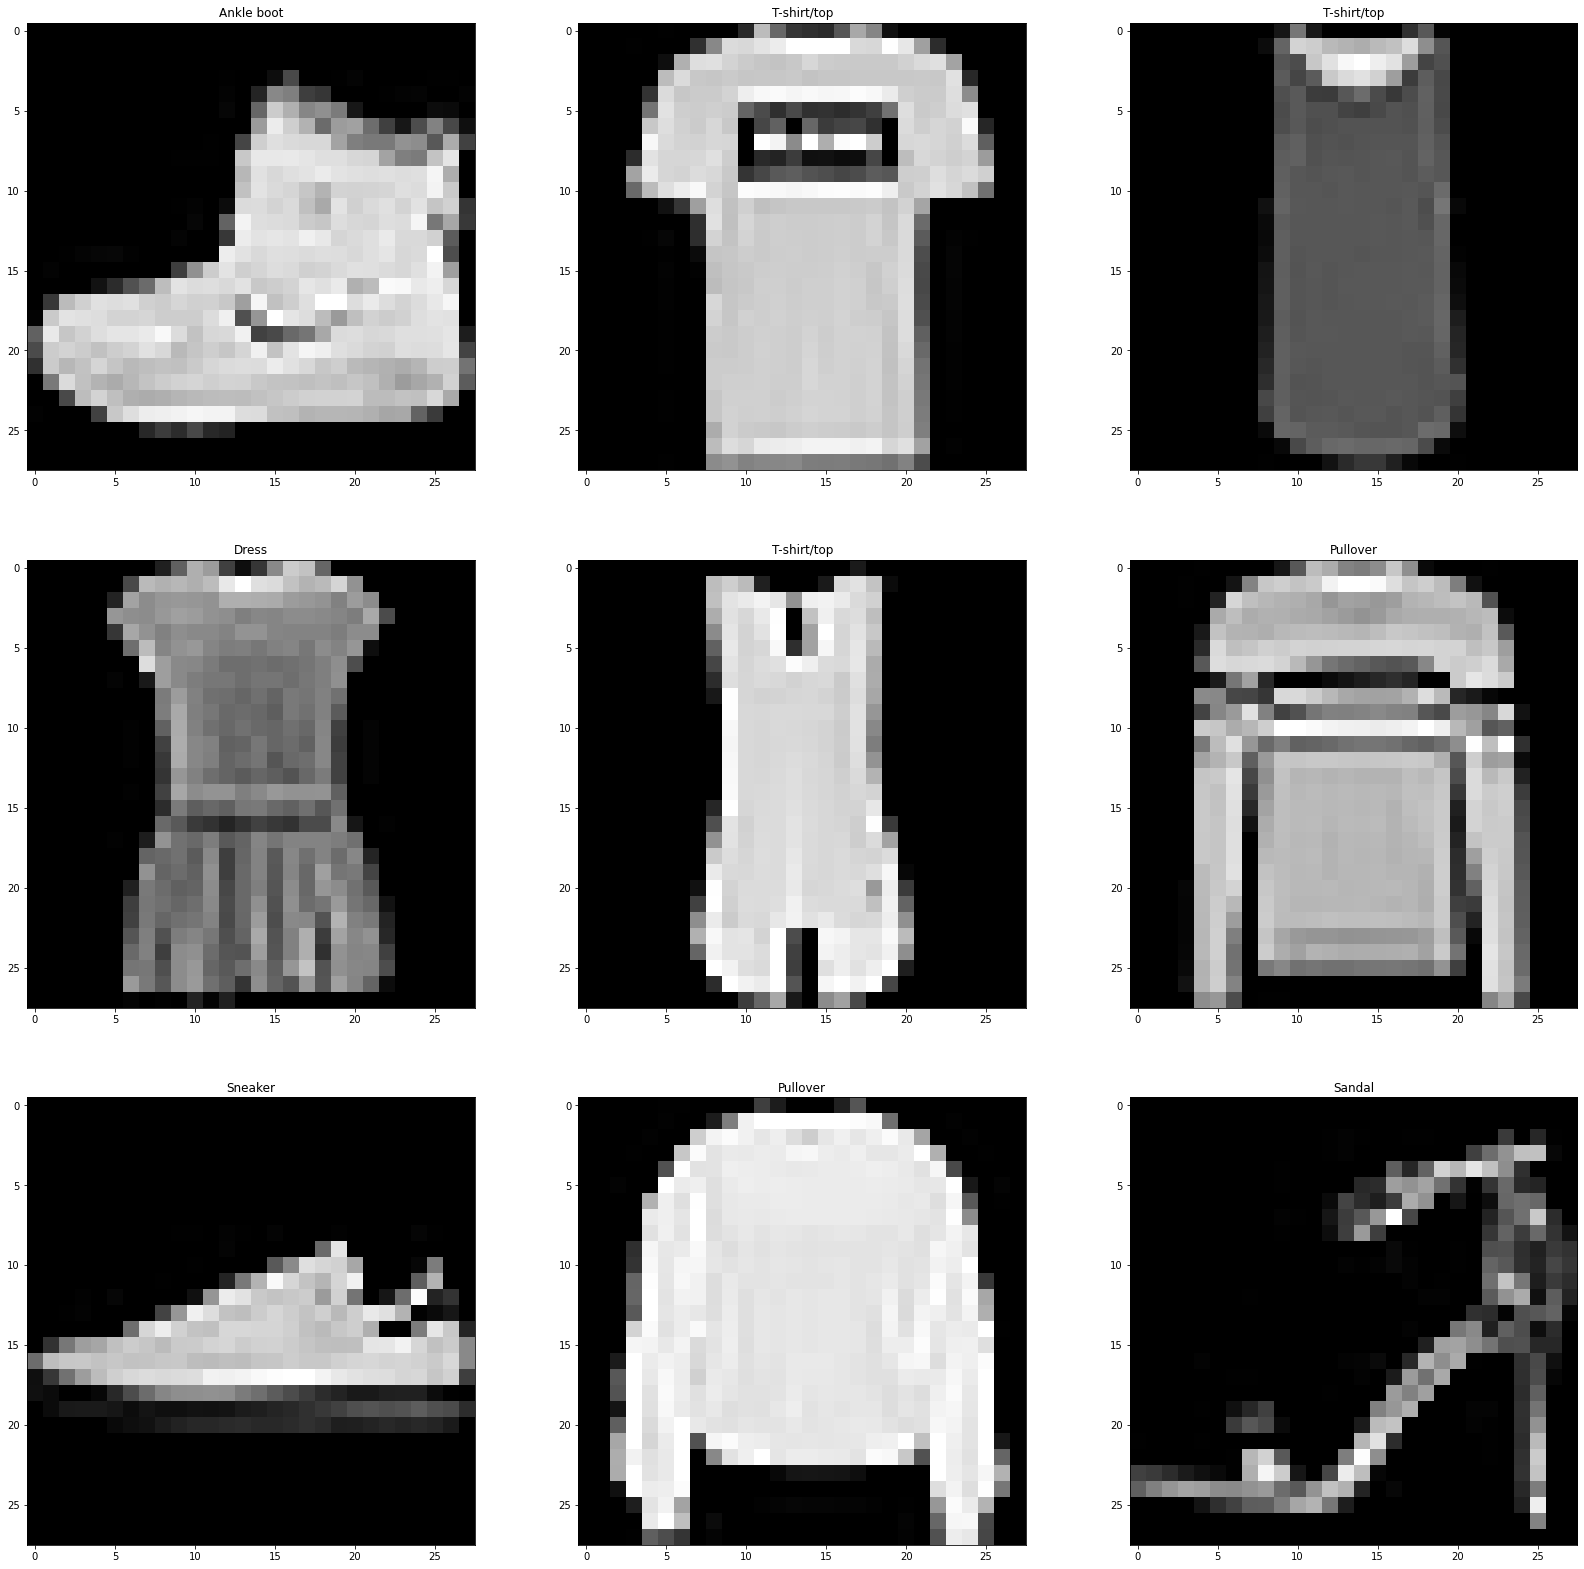

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

n_to_show = 3
f, axs = plt.subplots(n_to_show, n_to_show, figsize=(28, 28))
for i, axi in enumerate(axs.flat):
    axi.imshow(train_img[i], cmap='gray', vmin=0, vmax=255)
    axi.set_title(class_names[train_lbl[i]])

plt.show()


- images en noirs et blancs codées en uint8 : la valeur de chaque pixel est comprise entre 0 et 255 inclus. 255 veut dire noir, 0 blanc

In [6]:
X_train = train_img / 255
X_val = val_img / 255

# rng = np.random.RandomState(4)

# for img in X_train:
#     rng.shuffle(img)

# for img in X_val:
#     rng.shuffle(img)


### 3 - Let's keras it

- Créer un multi-layer perceptron.
    - Rappel: un multi-layer perceptron est un ensemble de plusieurs layers de couches dense
    - Vous pouvez utiliser tf.keras.layers.Dense pour créer une couche dense
    - Vous pouvez utilisez tf.keras.Sequential pour créer un réseau composée d'une suite de layer
    - vous pouvez utiliser tf.keras.layer.Flatten pour "applatir" votre image en vecteur 1D.
    - La documentation est votre amie !
    
- Quelle doit être la taille de la couche d'entrée ?
- Quelle doit être la taille de la couche de sortie ?

In [7]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])


2021-12-15 15:47:21.201762: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-15 15:47:21.205678: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-15 15:47:21.219712: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Nous verrons dans la suite du cours ce que sont les paramètres si dessous, tels que l'optimizer.
Ce que fait l'instruction ci-dessous est définir comment entrainer notre réseau : quelle fonction de loss et algorithme de descente de gradient utiliser.

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=False),
              metrics=[
                  tf.keras.metrics.SparseCategoricalAccuracy()])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0

- Entrainez ce modele sur 10 epoques sur notre jeu d'entrainement (model.fit(...), puis evaluez sa performance (model.evaluate(...))

In [10]:
%%time
history = model.fit(X_train, train_lbl, batch_size=64, epochs=100)


Epoch 1/100
938/938 [==============================] - 49s 53ms/step - loss: 0.5254 - sparse_categorical_accuracy: 0.8174
Epoch 2/100
938/938 [==============================] - 46s 49ms/step - loss: 0.4977 - sparse_categorical_accuracy: 0.8274
Epoch 3/100
938/938 [==============================] - 48s 52ms/step - loss: 0.4848 - sparse_categorical_accuracy: 0.8332
Epoch 4/100
938/938 [==============================] - 38s 41ms/step - loss: 0.4803 - sparse_categorical_accuracy: 0.8340
Epoch 5/100
938/938 [==============================] - 45s 48ms/step - loss: 0.4742 - sparse_categorical_accuracy: 0.8357
Epoch 6/100
938/938 [==============================] - 41s 44ms/step - loss: 0.4706 - sparse_categorical_accuracy: 0.8388
Epoch 7/100
938/938 [==============================] - 47s 50ms/step - loss: 0.4717 - sparse_categorical_accuracy: 0.8370
Epoch 8/100
938/938 [==============================] - 39s 41ms/step - loss: 0.4617 - sparse_categorical_accuracy: 0.8414
Epoch 9/100
938/938 [===

In [11]:
test_loss, test_acc = model.evaluate(X_val, val_lbl)

print('Test accuracy:', test_acc)
print('Last test accuracy: 0.8307999968528748')


313/313 [==============================] - 10s 26ms/step - loss: 0.4951 - sparse_categorical_accuracy: 0.8307
Test accuracy: 0.8306999802589417
Last test accuracy: 0.8307999968528748


- Imaginez maintenant que les fausses classifications sont critiques pour le métier. Evaluez le modele précedent (si possible sans le re-entrainer) de façon à faire apparaitre les fausses alertes. Vous pouvez utiliser scikit-learn pour les metriques !
- Difficultée : on est en multi labels !

In [12]:
from sklearn.metrics import multilabel_confusion_matrix
y_val_hat = model.predict(X_val)
val_predicted = np.argmax(y_val_hat, axis=1)

cm = multilabel_confusion_matrix(val_lbl, val_predicted)


- keras possedait la méthode predict_classes, mais elle est depreciée, et la "bonne" façon d'obtenir les classes à partir des probabilitées
est argmax(predict(...), axis=-1
- ne pas avoir exactement le bon format de label est un problème récurrent
- un print() des labels est souvent le meilleur moyen de voir le format actuel, et un peu de numpy/comprehension de liste 
peut être plus rapide que de chercher les méthodes de scikit avec un peu d'entrainement